<h1 style="text-align:center;margin-top:0;color:#ae1614;">BÁO CÁO TIẾN ĐỘ GIỮA KỲ BÀI TẬP LỚN TRÍ TUỆ NHÂN TẠO</h1>

<h2 style="text-align:center;margin-top:0;color:#ae1614;">ỨNG DỤNG THUẬT TOÁN K-NN NHẰM DỰ ĐOÁN BỆNH NHÂN MẮC BỆNH TIỂU ĐƯỜNG</h2>

<h2 style="margin-top:0;">I. GIỚI THIỆU VỀ ĐỀ TÀI, PHƯƠNG PHÁP THUẬT TOÁN THỰC HIỆN</h2>

<h3 style="margin-top:0;">1. Giới thiệu đề tài</h3>

<p style="text-align:justify;">Đề tài nhóm lựa chọn là bài toán học máy phân lớp dữ liệu sử dụng thuật toán K-NN (K Nearest Neighbors hay K Láng giềng gần) và được ứng dụng trong thực tế với công việc dự đoan khả năng mắc bệnh tiểu đường. Bệnh tiểu đường là một căn bệnh nguy hiểm và có thể để lại những biến chứng, tác hại nghiêm trọng nếu không được phát hiện từ sớm. Dựa trên các thông tin về sức khỏe của người bệnh(cân nặng, chiều cao, hàm lượng máu, các chỉ số y tế,…) để xây dựng nên thuật toán K-NN  giúp dự đoán khả năng mắc bệnh tiểu đường trong tương lai.</p>

<h3 style="margin-top:0;">2. Giới thiệu thuật toán K-NN (K Nearest Neighbors)</h3>

<p style="text-align:justify;">K-nearest neighbor là một trong những thuật toán supervised-learning đơn giản nhất trong Machine Learning. Khi training, thuật toán này không học một điều gì từ dữ liệu training, mọi tính toán được thực hiện khi nó cần dự đoán kết quả của dữ liệu mới. Thuật toán K-NN áp dụng trong bài toán trên thuộc lớp bài toán Classification (Phân Loại) của Machine Learing.  
Thuật toán KNN cho rằng những dữ liệu tương tự nhau sẽ tồn tại gần nhau trong một không gian, từ đó công việc của chúng ta là sẽ tìm k điểm gần với dữ liệu cần kiểm tra nhất. Việc tìm khoảng cách giữa 2 điểm củng có nhiều công thức có thể sử dụng, tùy trường hợp mà chúng ta lựa chọn cho phù hợp. Đối với phạm vi của đề tài nhóm thực hiện, nhóm sử dụng hàm Euclide để tính toán khoảng cách.<p>
<img src="https://www.delftstack.com/img/Math/euclidean%20distance.png"></img>
<p style="text-align:justify;">Sau khi tính toán được khoảng cách từ điểm dữ liệu mới tới các điểm xung quanh. Label của một điểm dữ liệu mới đó được suy ra trực tiếp từ K điểm dữ liệu gần nhất trong training set. Label của một test data có thể được quyết định bằng major voting (bầu chọn theo số phiếu) giữa các điểm gần nhất, hoặc nó có thể được suy ra bằng cách đánh trọng số khác nhau cho mỗi trong các điểm gần nhất đó rồi suy ra label.</p>

<h2 style="margin-top:0;">II. CHI TIẾT THỰC HIỆN THUẬT TOÁN VÀ KẾT QUẢ CHẠY</h2>

<h3 style="margin-top:0;">Khai báo một số thư viện hỗ trợ</h3>

In [13]:
import csv
import numpy as np
import math
import pandas as pd

<h3 style="margin-top:0;">Đọc và xử lý dữ liệu đầu vào từ file .csv và phân chia tập dữ liệu</h3>

<p style="text-align:justify;">Tập dữ liệu sử dụng cho thuật toán là tập dữ liệu diabetes (tiểu đường) chứa các thông số phục vụ cho việc phát hiện bệnh tiểu đường bao gồm 8 thông tin về: <b>Pregnancies</b> - số lần mang thai, <b>Glucose</b> - hàm lượng đường trong máu, <b>BloodPressure</b> - huyết áp, <b>SkinThickness</b> - độ dày của da, <b>Insulin </b> - chỉ số hormone Insulin trong máu, <b>BMI</b> - chỉ số BMI, <b>DiabetesPedigreeFunction</b> - chỉ số ước tính nguy cơ mắc bênh dựa trên tiền sử của gia đình về bệnh tiểu đường, <b>Age</b> - Tuổi tác.</p>

In [14]:
file = open("diabetes.csv", "r")
dataset = csv.reader(file)#đọc dữ liệu đầu vào
dataset = np.array(list(dataset))#chuyển về dạng ma trận
dataset = np.delete(dataset,0,0)#xóa header
file.close()
#Phân chia tập dữ liệu về tập Test và tập Training
trainingData = dataset[:538]#Tập training bao gồm 500 bản ghi dữ liệu đầu tiên
testData = dataset[538:]#Tập test bao gồm các bản ghi dữ liệu còn lại

<h3 style="margin-top:0;">Hiển thị dữ liệu của tập Training</h3>

In [3]:
print(pd.DataFrame(trainingData,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]))

    Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0             6     148            72            35       0  33.6   
1             1      85            66            29       0  26.6   
2             8     183            64             0       0  23.3   
3             1      89            66            23      94  28.1   
4             0     137            40            35     168  43.1   
..          ...     ...           ...           ...     ...   ...   
533           6      91             0             0       0  29.8   
534           1      77            56            30      56  33.3   
535           4     132             0             0       0  32.9   
536           0     105            90             0       0  29.6   
537           0      57            60             0       0  21.7   

    DiabetesPedigreeFunction Age Outcome  
0                      0.627  50       1  
1                      0.351  31       0  
2                      0.672  32       1  

<h3 style="margin-top:0;">Hiển thị dữ liệu của tập Test</h3>

In [4]:
print(pd.DataFrame(testData,columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]))

    Pregnancies Glucose BloodPressure SkinThickness Insulin   BMI  \
0             0     127            80            37     210  36.3   
1             3     129            92            49     155  36.4   
2             8     100            74            40     215  39.4   
3             3     128            72            25     190  32.4   
4            10      90            85            32       0  34.9   
..          ...     ...           ...           ...     ...   ...   
225          10     101            76            48     180  32.9   
226           2     122            70            27       0  36.8   
227           5     121            72            23     112  26.2   
228           1     126            60             0       0  30.1   
229           1      93            70            31       0  30.4   

    DiabetesPedigreeFunction Age Outcome  
0                      0.804  23       0  
1                      0.968  32       1  
2                      0.661  43       1  

<h3 style="margin-top:0;">Xây dựng hàm tính khoảng cách dựa trên hàm khoảng cách Euclide</h3>
<img src="https://www.delftstack.com/img/Math/euclidean%20distance.png"></img>

In [15]:
def computeDistance(data1,data2):
  res = 0;
  for i in range(8):
    res += ( float(data1[i]) - float(data2[i])  )**2
  return math.sqrt(res)


<h3 style="margin-top:0;">Xây dựng hàm K-NN bao gồm việc tính khoảng cách và lấy nhãn của các điểm trong tập Training với điểm đang được xét</h3>

In [11]:
def computeKNN(trainingData,point,k):
  distance = []#mảng chứa khoảng cách các điểm
  for data in trainingData:
    #khai bao dictionary bao gồm nhãn và khoảng cách từ các điểm trong tập training đến điểm được xét
    label_distance = {
        "label" : data[-1],
        "dis": computeDistance(data,point)
    }
    distance.append(label_distance)
    #Sắp xếp lại mảng theo thứ tự tăng dần dựa trên khoảng cách
  distance.sort(key = lambda x: x["dis"])
  label = []
    #Lấy ra label của k điểm gần nhất đơi với điểm được xét
  for element in distance:
    label.append(element["label"])
  return label[:k]


<h3 style="margin-top:0;">Xây dựng hàm dự đoán kết quả dựa trên nhãn của k điểm gần nhất</h3>
<p>Nhãn sẽ được quyết định dựa trên major voting, tức trong k điểm gần nhất nhãn nào xuất hiện nhiều hơn thì nhãn đó sẽ được gán cho điểm đang xét</p>

In [12]:
def predict(label):
  num1 = 0
  num0 = 0
#Đếm số lượng mỗi nhãn trong k điểm gần nhất
  for element in label:
    if int(element) == 1:
      num1 = num1 + 1
    else:
      num0 = num0 + 1
#so sánh số lượng mỗi nhãn để chọn ra nhãn gán cho điểm
  if num1 > num0 :
    return 1
  else:
    return 0

<h3 style="margin-top:0;">Xây dựng hàm đánh giá kết quả giữa nhãn thật và nhãn được gán khi phân loại</h3>
<p>So sánh kết quả giữa 2 nhãn rồi phân loại vào 4 nhóm sau đây:</p>
<ul>
    <li>TP - True Positive: Nhãn thật thuộc nhóm dương và nhãn phân loại cũng thuộc nhóm dương</li>
    <li>FN - False Negative: Nhãn thật thuộc nhóm âm nhưng nhãn phân loại thuộc nhóm dương</li>
    <li>FP - False Positive: Nhãn thật thuộc nhóm dương nhưng nhãn phân loại thuộc nhóm âm</li>
    <li>TN - True Negative: Nhãn thật thuộc nhóm âm và nhãn phân loại cũng thuộc nhóm âm</li>
</ul>

In [16]:
def evaluate(x,y):
    tp = 0
    fn = 0
    fp = 0
    tn = 0
    if (x==1 and y == 1):
        tp = 1
    elif (x == 1 and y == 0):
        fn = 1
    elif (y == 1):
        fp = 1
    else:
        tn = 1
    return [tp,fn,fp,tn]

<h3 style="margin-top:0;">Thực hiên quá trình phân loại dữ liệu trong tập Test và kết quả phân loại</h3>
<p style="font-size:16px;">Lựa chọn k = 5, tức 5 điểm gần điểm được xét nhất để gán nhãn cho điểm đó</p>

In [14]:
k = 5
TP = 0
FN = 0  
FP = 0  
TN = 0  
#Thực hiện phân loại dữ liệu trong TestData
for element in testData:
    label = computeKNN(trainingData, element, k)
    #print("True = ", element[-1], "Predict = ", predict(label))
    tp, fn, fp, tn = evaluate(int(element[-1]), predict(label))  
    TP += tp
    FN += fn
    FP += fp
    TN += tn
data_size = len(testData)
#print(data_size)
#Hiển thi số lượng các nhãn dán của 4 nhóm đánh giá chất lượng
print("TP =", TP) 
print("FN =", FN) 
print("FP =", FP) 
print("TN =", TN) 
#Tính toán các chỉ số để đánh giá độ chính xác của thuật toán
accuracy =round(float( (TP + TN)/data_size),2)
precision = float(TP/(TP+FP)) # tính tỉ lệ số người thực sự bị bệnh trong những người được dự đoán bị bệnh
recall = float(TP/(TP+FN)) #tính tỉ lệ dự đoán chính xác trong những người bị bệnh

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

TP = 49
FN = 37
FP = 39
TN = 143
Accuracy: 72.00%
Precision: 55.68%
Recall: 56.98%


<b>Chú thích các kết quả phân loại dữ liệu:</b>
<ul>
    <li><b>TP - True Positive:</b> Số người bị bệnh và được dự đoán là bị bệnh</li>
    <li><b>FN - False Negative:</b> Số người bị bệnh nhưng được dự đoán là không bị bệnh</li>
    <li><b>FP - False Positive:</b> Số người không bị bệnh những được dự đoán là bị bệnh</li>
    <li><b>TN - True Negative:</b> Số người không bị bệnh và được dự đoán là không bị bệnh</li>
    <li><b>Accuracy:</b> Tỉ lệ giữa những người được dự đoán đúng tình trạng và tổng số người trong tập dữ liệu Test</li>
    <li><b>Precision:</b> Tỉ lệ số người bị bệnh mô hình dự đoán đúng trên tổng số người mô hình dự đoán là bị bệnh</li>
    <li><b>Recall:</b> Tỉ lệ số người bị bệnh mô hình dự đoán đúng trên tổng số người thật sự bị bệnh (hay tổng số người được gán nhãn là bị bệnh ban đầu).</li>
</ul>

<h2 style="margin-top:0;">III. Khó khăn cần được giải quyết và một số phương án nâng cao hiệu suất</h2>

<h3 style="margin-top:0;">1. Độ chính xác của việc phân loại chưa được cao</h3>

<p style="text-align: justify;">Theo kết quả chương trình chạy ở phần trên độ chính xác của các điểm được dự đoán đúng nhãn chỉ mới dừng lại ở 72%, nguyên nhân có thể là do số kiểm K được chọn còn khá nhỏ (k=5). Để có thể cải thiện hiệu suất của việc dự đoán, nhóm sẽ cố gắng lựa chọn con số K lớn hơn nhưng phải phù hợp để tránh tình trạng số lượng điểm quá nhiều gây ra hiện tượng nhiễu dẫn đến sai lệch về dự đoán. Đồng thời kết hợp với yếu tố đánh trọng số trong việc phân loại kết quả, tức những điểm có khoảng cách gần điểm được xét hơn sẽ được đánh trọng số cao hơn để nâng cao khả năng được dự đoán đúng nhãn của điểm đang xét.</p>

<h3 style="margin-top:0;">2. Cần tối ưu thêm thời gian chạy chương trình</h3>
<p style="text-align: justify;">Thuật toán K-NN phải tính khoảng cách giữa điểm dữ liệu mới và tất cả các điểm dữ liệu trong tập huấn luyện. Điều này có thể gây tốn nhiều thời gian, đặc biệt là khi kích thước của tập dữ liệu lớn và công thức tính khoảng cách phức tạp với nhiều trường thông tin. Để nâng cao hiệu suất, nhóm cần tìm hiểu thêm về một số kỹ thuật cải thiện thời gian chạy như: Kỹ thuật tìm kiếm gần nhất, Kỹ thuật cây tìm kiếm, Kỹ thuật k-d tree, ...</p>

<h2 style="margin-top:0;">IV. Tổng kết</h2>

<p style="text-align: justify;">Mặc dù sử dụng thuật toán KNN được đánh giá không phải là 1 thuật toán tối ưu và chính xác để dự báo kết quả cuối cùng, việc xử lý và thực hiện vẫn đưa ra được độ chính xác 72%. Tuy nhiên vẫn cần thay đổi và phát triển.
    
Đối với các thuật toán đánh giá khác, con số 72% được đánh giá thấp. Vì vậy nên nếu muốn dự đoán chuyên sâu ta cần nghiên cứu và chọn lựa lại 1 thuật toán tối ưu và nhanh chóng hơn</p>

In [17]:
def new_computeKNN(trainingData,point,k):
  distance = []
  for data in trainingData:
    #khai bao dictionary
    label_distance = {
        "label" : data[-1],
        "dis": computeDistance(data,point)
    }
    distance.append(label_distance)
  distance.sort(key = lambda x: x["dis"])

  return distance[:k]

In [19]:
def new_predict(label):
  weight1 = 0
  weight2 = 0
  for element in label:
    if int(element["label"]) == 1:
      weight1 += 1/float(element["dis"])
    else:
      weight2 += 1/float(element["dis"])
  if weight1 > weight2: 
    return 1
  else:
    return 0

In [9]:
data_size = len(testData)

In [24]:
k = 23
TP = 0
FN = 0
FP = 0
TN = 0

for element in testData:
    label = new_computeKNN(trainingData, element, k)
    #print("True = ", element[-1], "Predict = ", predict(label))

    tp, fn, fp, tn = evaluate(int(element[-1]), new_predict(label))
    TP += tp
    FN += fn
    FP += fp
    TN += tn
#print(data_size)
print("TP =", TP) # True Positive: người bị bệnh được dự đoán là bị bệnh
print("FN =", FN) # False Negative: người bị bệnh được dự đoán là không có bệnh
print("FP =", FP) # False Positive: người không bị bệnh được dự đoán là bị bệnh
print("TN =", TN) # True Negative: người không bị bệnh được dự đoán là không bị bệnh

accuracy =round(float( (TP + TN)/data_size),2)
precision = float(TP/(TP+FP)) # tính tỉ lệ số người thực sự bị bệnh trong những người được dự đoán bị bệnh
recall = float(TP/(TP+FN)) #tính tỉ lệ dự đoán chính xác trong những người bị bệnh

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

TP = 41
FN = 0
FP = 16
TN = 173
Accuracy: 93.00%
Precision: 71.93%
Recall: 100.00%


In [10]:
data_points = []
maxa = 0
ide = 0 
for k in range(15,51):
    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for element in testData:
        label = new_computeKNN(trainingData, element, k)
        #print("True = ", element[-1], "Predict = ", predict(label))

        tp, fn, fp, tn = evaluate(int(element[-1]), new_predict(label))
        TP += tp
        FN += fn
        FP += fp
        TN += tn
    accuracy =round(float( (TP + TN)/data_size),2)
    if accuracy > maxa:
        maxa = accuracy
        ide = k
    data_points.append([k,accuracy])

In [12]:
print(maxa)
print(k)

0.78
50


In [35]:
import matplotlib.pyplot as plt

def display_k_and_accuracy(data_points):
    k_values, accuracy_values = zip(*data_points)
    

    plt.plot(k_values, accuracy_values, marker='o', linestyle='-', color='b', label='Accuracy')

    max_point = max(data_points, key=lambda point: point[1])
    plt.scatter([max_point[0]], [max_point[1]], color='red', label=f'Max Accuracy: {max_point[1]}', zorder=5)

    plt.xlabel('Giá trị k')
    plt.ylabel('Độ chính xác (Accuracy)')

    plt.title('Biểu đồ Accuracy theo giá trị k')

    plt.legend()
    plt.show()

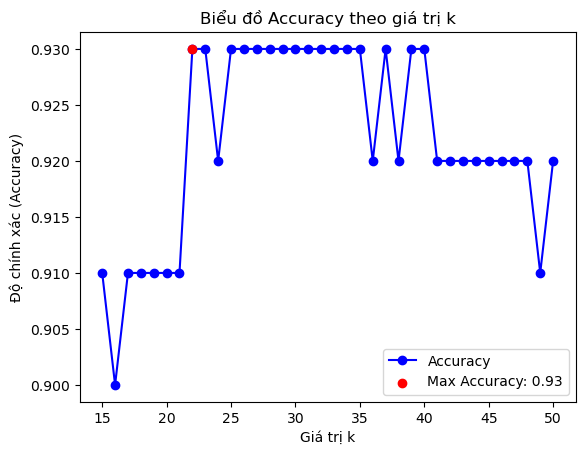

In [38]:
display_k_and_accuracy(data_points)

In [19]:
Edata_points = []
for k in range(10, 51):
    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for element in testData:
        label = new_computeKNN(trainingData, element, k)
        tp, fn, fp, tn = evaluate(int(element[-1]), new_predict(label))
        TP += tp
        FN += fn
        FP += fp
        TN += tn

    error_rate = round(float(FP + FN) / data_size, 2)*100
    Edata_points.append([k, error_rate])


In [20]:
import matplotlib.pyplot as plt

def display_error_rate(Edata_points):
    x_values, y_values = zip(*Edata_points)

    plt.plot(x_values, y_values, label='Đồ thị error rate * 100')

    min_point = min(Edata_points, key=lambda point: point[1])
    plt.scatter([min_point[0]], [min_point[1]], color='blue', label=f'Min: {min_point[1]}', zorder=5)

    plt.xlabel('Trục K')
    plt.ylabel('Trục Error Rate * 100')

    plt.title('Đồ thị error rate * 100 và điểm có giá trị Error Rate * 100 thấp nhất')

    plt.legend()
    plt.show()

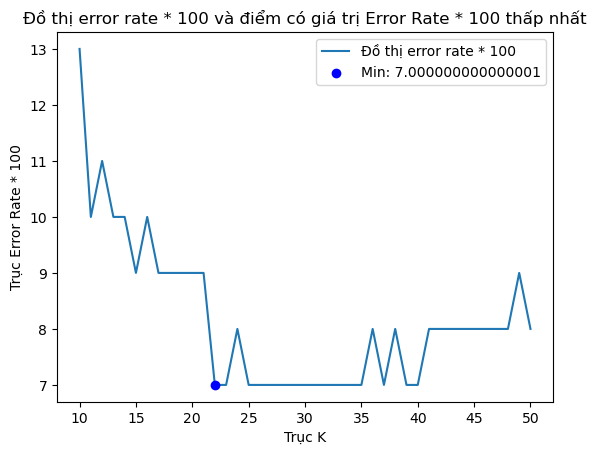

In [21]:
display_error_rate(Edata_points)


# 15/12


In [20]:
numeric_dataset = dataset.astype(float)

# Tạo một mảng boolean với điều kiện
condition = np.all(numeric_dataset[:, 1:8] != 0, axis=1)

# Lọc dataset ban đầu dựa trên mảng boolean
filtered_dataset = dataset[condition]

print(filtered_dataset)

[['1' '89' '66' ... '0.167' '21' '0']
 ['0' '137' '40' ... '2.288' '33' '1']
 ['3' '78' '50' ... '0.248' '26' '1']
 ...
 ['2' '88' '58' ... '0.766' '22' '0']
 ['10' '101' '76' ... '0.171' '63' '0']
 ['5' '121' '72' ... '0.245' '30' '0']]


In [21]:
trainingData = filtered_dataset[:274]
testData = filtered_dataset[274:]

In [22]:
siez = len(filtered_dataset)
print(siez)

392


In [23]:
data_size = len(testData)
print(data_size)

118


In [25]:
data_points = []
maxa = 0
ide = 0
for k in range(0,51):
    TP = 0
    FN = 0
    FP = 0
    TN = 0

    for element in testData:
        label = new_computeKNN(trainingData, element, k)
        #print("True = ", element[-1], "Predict = ", predict(label))

        tp, fn, fp, tn = evaluate(int(element[-1]), new_predict(label))
        TP += tp
        FN += fn
        FP += fp
        TN += tn
    accuracy =round(float( (TP + TN)/data_size),10)
    if accuracy > maxa:
        maxa = accuracy
        ide = k
    data_points.append([k,accuracy])

In [26]:
print(maxa)
print(k)

0.8305084746
50


In [28]:
k = 15
TP = 0
FN = 0
FP = 0
TN = 0

for element in testData:
    label = new_computeKNN(trainingData, element, k)
    #print("True = ", element[-1], "Predict = ", predict(label))

    tp, fn, fp, tn = evaluate(int(element[-1]), new_predict(label))
    TP += tp
    FN += fn
    FP += fp
    TN += tn
#print(data_size)
print("TP =", TP) # True Positive: người bị bệnh được dự đoán là bị bệnh
print("FN =", FN) # False Negative: người bị bệnh được dự đoán là không có bệnh
print("FP =", FP) # False Positive: người không bị bệnh được dự đoán là bị bệnh
print("TN =", TN) # True Negative: người không bị bệnh được dự đoán là không bị bệnh

accuracy =round(float( (TP + TN)/data_size),2)
precision = float(TP/(TP+FP)) # tính tỉ lệ số người thực sự bị bệnh trong những người được dự đoán bị bệnh
recall = float(TP/(TP+FN)) #tính tỉ lệ dự đoán chính xác trong những người bị bệnh

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")

TP = 27
FN = 10
FP = 11
TN = 70
Accuracy: 82.00%
Precision: 71.05%
Recall: 72.97%
